# Sales Performance Analytics and Product Intelligence for Sneaker Brands

## Introduction

In this project, I will explore and analyze the sales performance and attributes of various sneaker products. The purpose of this  analysis is to uncover key insights into factors such as pricing, product types, seasonal trends, and the impact of damage rates on sales.

The analysis will help to answer the following expert-level questions:
- How do sales performance and product type influence overall profitability?
- What factors contribute to unsold inventory?
- How do price points impact damage rates and sales performance?
- What is the seasonal impact on sales?

## Data Source
This data was sourced from kaggles via the link provided below:

https://www.kaggle.com/datasets/comhek/500-snickers-dataset

#### Compute/Cluster Configurations used
- **Databricks Runtime Version** : 12.2 LTS (includes Apache Spark 3.3.2, Scala 2.12)
- **Driver Type** : Community Optimised 15.3 GM Memory, 2 Cores
- **Spark Config** : spark.databricks.rocksDB.fileManager.useCommitService false
- **Environment Variable** : PYSPARK_PYTHON=/databricks/python3/bin/python3


## Data Overview

Key variables of the dataset and their descriptions:

| Column Name             | Description                                                         |
|-------------------------|---------------------------------------------------------------------|
| `name`                  | Name of the sneaker.                                                |
| `type`                  | The color/type of the sneaker.                                       |
| `total_produced`        | Total number of items produced.                                     |
| `total_sold`            | Total number of sneakers sold.                                         |
| `damaged`               | Number of sneakers damaged.                                            |
| `month`                 | Month of the sneaker release.                                       |
| `year`                  | Year of the sneaker release.                                        |
| `edition`               | Edition type (Limited, Special, etc.).                              |
| `price`                 | Price of the sneaker.                                               |
| `gender`                | Target gender (Men/Women).                                          |
| `sell_through_rate`     | Percentage of sold sneakers out of total produced.                     |
| `damage_rate`           | Percentage of damaged sneakers out of total produced.                  |
| `unsold_inventory`      | Number of unsold inventory.                                         |
| `estimated_revenue`     | Total estimated revenue from the sales of the sneakers.              |
| `quarter`               | Fiscal quarter (Q1, Q2, Q3 and Q4).                                      |
| `date`                  | Product release date.                                               |
| `is_limited_edition`    | Whether the sneaker is a limited edition (1 for Yes, 0 for No).      |
| `price_bucket`          | Price category (High, Low, Mid).                                         |
| `manufacturing_date`    | Date when the product was manufactured.                             |
| `selling_date`          | Date when the product was sold.                                     |

## Importing libraries and Loading dataset into the databricks 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Define dataset path For local Databricks
file_path = "dbfs:/FileStore/tables/snicker_dataset_with_dates.csv"  

# Load CSV with explicit schema inference and header recognition Parameters:
#   - header=True: First row contains column names  
#   - inferSchema=True: Automatically detect data types (avoid all strings)
#   - escape='"': Handle quoted fields properly
sneakers = spark.read.option("header", True).option("inferSchema", True).option("escape", '"').csv(file_path)

In [0]:
sneakers.display()

name,type,total_produced,total_sold,damaged,month,year,edition,price,gender,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,quarter,date,is_limited_edition,price_bucket,manufacturing_date,selling_date
Nike Air Force 1 '07 Sneakers,Creamy,24592,5819,9012,September,2017,Limited,115,Men,23.66216655823032,36.64606376057255,9761,669185,Q3,2017-09-01,1,High,2017-09-01,2017-11-06
Adidas Originals Samba OG Shoes,Creamy,81482,16395,38698,September,2019,Standard,100,Men,20.12100832085614,47.49269777374144,26389,1639500,Q3,2019-09-01,0,Mid,2019-09-01,2019-09-30
Air Jordan 1 Mid Shoes,Peanut Butter,76237,8478,26062,January,2023,Special Release,110,Women,11.120584493093904,34.18550047877015,41697,932580,Q1,2023-01-01,1,High,2023-01-01,2023-03-28
Red Tape Casual Sneakers,Brownie,46463,5425,10463,October,2022,Anniversary,35,Men,11.67595721326647,22.518993607816974,30575,189875,Q4,2022-10-01,0,Low,2022-10-01,2022-12-15
Nike Court Vision Low Shoes,Peanut Butter,54118,11698,6078,April,2019,Standard,80,Women,21.615728593074397,11.231013710780148,36342,935840,Q2,2019-04-01,0,Mid,2019-04-01,2019-05-06
Puma Smash V2 Sneakers,Brownie,44671,7847,30108,January,2021,Standard,65,Women,17.566206263571445,67.39943139844642,6716,510055,Q1,2021-01-01,0,Mid,2021-01-01,2021-03-31
Converse Chuck Taylor All Star,Classic,82357,43427,23700,June,2021,Limited,60,Men,52.73018686936144,28.7771531260245,15230,2605620,Q2,2021-06-01,1,Mid,2021-06-01,2021-08-29
New Balance 574 Core,Creamy,39871,23965,1307,August,2024,Limited,90,Women,60.10634295603321,3.2780717814953224,14599,2156850,Q3,2024-08-01,1,Mid,2024-08-01,2024-09-08
Reebok Classic Leather,Almond,69429,46660,11954,October,2016,Holiday,85,Women,67.20534646905472,17.217589191836264,10815,3966100,Q4,2016-10-01,0,Mid,2016-10-01,2016-10-18
Under Armour Charged Assert 9,Creamy,99593,89939,1169,October,2021,Limited,75,Men,90.30654764893114,1.1737772735031575,8485,6745425,Q4,2021-10-01,1,Mid,2021-10-01,2021-11-06


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.


## Data Wrangling

In this section, we will clean and preprocess the data to ensure that it's ready for analysis:

- Handle missing or inconsistent data.
- Confirming columns have appropriate data types.
- Deal with any duplicates in the dataset if any.

In [0]:
# Print schema to verify inferred types
print("SCHEMA VERIFICATION:")
sneakers.printSchema()

# Record count validation
total_records = sneakers.count()
print(f"\nTOTAL RECORDS LOADED: {total_records:,}") 

SCHEMA VERIFICATION:
root
 |-- name: string (nullable = true)
 |-- type: string (nullable = true)
 |-- total_produced: integer (nullable = true)
 |-- total_sold: integer (nullable = true)
 |-- damaged: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- sell_through_rate: double (nullable = true)
 |-- damage_rate: double (nullable = true)
 |-- unsold_inventory: integer (nullable = true)
 |-- estimated_revenue: integer (nullable = true)
 |-- quarter: string (nullable = true)
 |-- date: date (nullable = true)
 |-- is_limited_edition: integer (nullable = true)
 |-- price_bucket: string (nullable = true)
 |-- manufacturing_date: date (nullable = true)
 |-- selling_date: date (nullable = true)


TOTAL RECORDS LOADED: 500


%md
#### Rows with missing records

In [0]:
from pyspark.sql.functions import col
from functools import reduce

# Filter rows with any missing values
missing_records_sneakers = sneakers.filter(
    reduce(lambda a, b: a | b, [col(c).isNull() for c in sneakers.columns])
)

missing_records_sneakers.show()

+----+----+--------------+----------+-------+-----+----+-------+-----+------+-----------------+-----------+----------------+-----------------+-------+----+------------------+------------+------------------+------------+
|name|type|total_produced|total_sold|damaged|month|year|edition|price|gender|sell_through_rate|damage_rate|unsold_inventory|estimated_revenue|quarter|date|is_limited_edition|price_bucket|manufacturing_date|selling_date|
+----+----+--------------+----------+-------+-----+----+-------+-----+------+-----------------+-----------+----------------+-----------------+-------+----+------------------+------------+------------------+------------+
+----+----+--------------+----------+-------+-----+----+-------+-----+------+-----------------+-----------+----------------+-----------------+-------+----+------------------+------------+------------------+------------+



**Observation**:

  - All fields have the required schema/data type.
  - No missing data found. All records were correctly inputed
  - There are 500 rows/records in the given sneakers dataset

#### Check for duplicates

In [0]:
# Count total duplicate rows (all columns)
total_duplicates = sneakers.count() - sneakers.distinct().count()
total_duplicates

Out[6]: 0

- No duplicates

#### Sneaker editions in the dataset

In [0]:
unique_names = sneakers.select('edition').distinct()

unique_names.show()

+---------------+
|        edition|
+---------------+
|Special Release|
|        Holiday|
|    Anniversary|
|       Standard|
|        Limited|
+---------------+



- Five categories of sneaker editions exists in the dataset

Out[8]: Text(0.5, 0, 'Unsold Units')

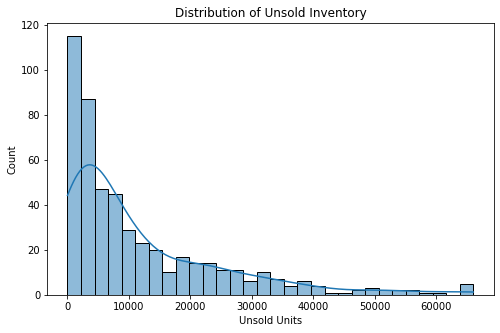

In [0]:
# Convert the PySpark DataFrame to a Pandas DataFrame
sneakers_pd = sneakers.toPandas()

plt.figure(figsize=(8, 5))
sns.histplot(sneakers_pd['unsold_inventory'], bins=30, kde=True)
plt.title("Distribution of Unsold Inventory")
plt.xlabel("Unsold Units")

**Findings**
  - The Unsoled inventory distribution is right-skewed implying that most products have moderate unsold units, while some have extremely high levels.

Out[9]: Text(0.5, 1.0, 'Unsold Inventory by Product Edition')

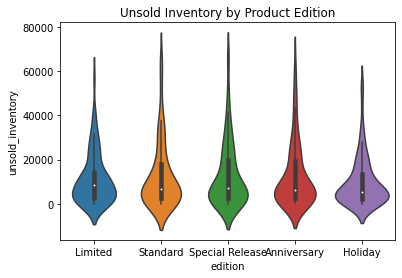

In [0]:
sns.violinplot(data=sneakers_pd, x='edition', y='unsold_inventory')
plt.title("Unsold Inventory by Product Edition")

- Limited Editions and Holiday editions tend to have higher unsold inventory — suggesting overproduction or overpricing.

## Exploratory Data Analysis (EDA)

### Overview of Key Metrics

Summary statistics (mean, median, standard deviation) for key variables such as:
- Total produced
- Total sold
- Sell-through rate
- Damage rate
- Estimated revenue

In [0]:
# Get the list of numeric columns
numeric_cols = [col for col, dtype in sneakers.dtypes if dtype in ('int', 'double', 'float', 'long')]

# Select only numeric columns from the DataFrame
numeric_sneakers = sneakers.select(numeric_cols)

# Generate descriptive statistics for numeric columns
numeric_sneakers.describe().display()

summary,total_produced,total_sold,damaged,year,price,sell_through_rate,damage_rate,unsold_inventory,estimated_revenue,is_limited_edition
count,500,500,500,500,500,500,500,500,500,500
mean,53757.092,29288.5,12631.328,2019.558,86.0,55.94665444521188,22.413722347421867,11837.264,2494872.89,0.38
stddev,26087.657543208425,21573.376256028365,13908.38518971872,2.8125534508392627,23.023034557600795,25.772109786137452,19.45879166181196,13373.964644297439,1970712.8449344102,0.48587255971970383
min,10191,5035,6,2015,35,6.381266192117112,0.0139236981342244,9,189000,0
max,99922,97181,78238,2024,140,99.83125566875488,89.97984741615086,66063,10689910,1


In [0]:
from pyspark.sql import functions as F


# Group by 'name' (sneaker category) and sum all numeric columns
numeric_sneakers = sneakers.groupBy("name").agg(*[F.sum(col).alias(f"sum_{col}") for col in numeric_cols])

# Show the result
numeric_sneakers.display()

name,sum_total_produced,sum_total_sold,sum_damaged,sum_year,sum_price,sum_sell_through_rate,sum_damage_rate,sum_unsold_inventory,sum_estimated_revenue,sum_is_limited_edition
Nike Court Vision Low Shoes,1335672,608824,362043,50483,2000,1203.7392408811295,656.561578887126,364805,48705920,11
ASICS Gel-Quantum 90,1293883,614213,331716,50496,2500,1343.1027012107327,576.0090708304808,347954,61421300,10
Skechers D'Lites,1205540,742277,286451,50495,1875,1466.7219712795288,605.5118898813015,176812,55670775,9
Onitsuka Tiger Mexico 66,1274262,814665,200904,50479,2500,1532.9060955482996,397.7230874311716,258693,81466500,13
Red Tape Casual Sneakers,1402895,664917,340300,50507,875,1214.7962964612195,594.6380819143554,397678,23272095,9
Converse Chuck Taylor All Star,1352755,744409,271133,50488,1500,1359.556154426779,482.6786183992499,337213,44664540,12
Saucony Jazz Original,1434994,824841,335285,50479,2000,1345.6940782820448,644.4685146453784,274868,65987280,5
Air Jordan 1 Mid Shoes,1615266,855565,294602,50483,2750,1398.3548579982316,432.56137088234595,465099,94112150,10
Vans Old Skool,1299295,643885,353081,50508,1750,1259.720812415968,621.4683494357911,302329,45071950,14
New Balance 574 Core,1452295,743819,441797,50474,2250,1344.1872409404796,708.8055995997272,266679,66943710,10


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

**Findings**
  - **Total produced**: 
    - Top Seller: Air Jordan 1 Mid Shoes lead with over 1.6M units sold.
    - Strong Performers: Under Armour Charged Assert 9, Nike Air Force 574 Core, and Fila Disruptor II Premium also exceeded 1.4M units.
    - Moderate Sales: Models like Adidas Originals Samba OG, Puma Smash V2, and Converse Chuck Taylor sold between 1.3M–1.4M units.
    - Low Performers: Lacoste Carnaby Evo and Red Tape Casual Sneakers had the lowest sales, below 1.2M units.
  - **Damage rate**:
    - Highest Damage Counts: New Balance 574 Core and Lacoste Carnaby Evo show the highest number of damaged units, exceeding 400K and 450K respectively—potentially pointing to quality or handling issues.
    - Above Average Damage: Under Armour Charged Assert 9, Nike Air Force 1 '07, and Hoka One One Clifton 8 also show high damage levels (above 350K units).
    - Lower Damage Rates: Lacoste Carnaby Evo, Onitsuka Tiger Mexico 66, and Skechers D’Lites are among the models with the lowest damage counts, with Lacoste just above 150K.
  - **Unsoled Invnetory**
    - Top Movers: Adidas Samba OG and Air Jordan 1 Mid Shoes lead with over 450K units sold from inventory.
    - Efficient Sellers: Red Tape Casual Sneakers and Nike Air Force 1 '07 also performed well, each selling around 400K units.
    - Moderate Inventory Turnover: Brands like ASICS Gel-Quantum 90, Fila Disruptor II Premium, and New Balance 574 Core sold between 300K–350K units.
    - Low Turnover: Lacoste Carnaby Evo, Skechers D’Lites, and Superga 2750 Cotu Classic had lower sell-through, each below 200K units.
  - **Estimated revenue**:
    - Top Earners: Air Jordan 1 Mid Shoes and Nike Air Force 1 '07 Sneakers lead with revenue above $90M each.
    - Strong Revenue: Onitsuka Tiger Mexico 66, Fila Disruptor II Premium, and Columbia Trailstorm Waterproof also generated over $70M.
    - Moderate Revenue: Brands like Adidas Samba OG, New Balance 574 Core, and Under Armour Charged Assert 9 earned between $60M–70M.
    - Low Revenue: Red Tape Casual Sneakers reported the lowest at around $25M, indicating weak market performance.


###  Distribution of Sell-through Rate

Let's visualize how the **sell-through rate** varies across different product types and price buckets. This will help us understand how well products are selling.

- **Questions to answer:**
    - How does sell-through rate vary by product type (edition)?
    - Are products in the "High" price bucket selling better or worse than those in the "Mid" price bucket?

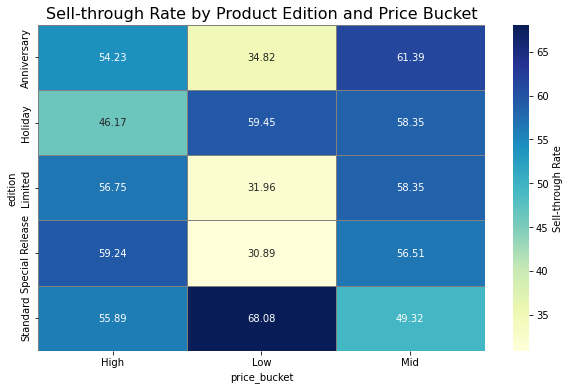

In [0]:
# Create a pivot table of sell-through rate by edition and price bucket
pivot_df = sneakers_pd.pivot_table(values='sell_through_rate', 
                          index='edition', 
                          columns='price_bucket', 
                          aggfunc=np.mean)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, 
            linecolor='gray', cbar_kws={'label': 'Sell-through Rate'})

plt.title('Sell-through Rate by Product Edition and Price Bucket', fontsize=16)
plt.show()


**Sell-Through Rate by Product Edition**
  - Anniversary: Highest sell-through in the Mid price bucket (61.39), lowest in Low (34.82).
  - Holiday: Highest in Mid (58.35), lowest in High (46.17).
  - Limited: Highest in High (56.75), lowest in Low (31.96).
  - Special Release: Highest in High (59.24), lowest in Low (30.89).
  - Standard: Highest in Low (68.08), lowest in Mid (49.32).

**High vs. Mid Price Bucket Performance**
  - For most editions (Anniversary, Holiday, Limited, Special Release), the Mid price bucket has similar or slightly lower sell-through rates compared to the High price bucket.
  - The Standard edition is an exception, with the highest sell-through rate in the Low price bucket (68.08), but in general, the High price bucket tends to outperform the Mid price bucket for most editions.

##  Revenue Analysis
#### Estimated Revenue by Product Type and Price Bucket
In this section, we will calculate and compare the estimated revenue across different product types (Limited, Special Release, Standard) and price buckets (High, Mid).

- Questions to answer:
  - Which product type generates the highest estimated revenue?
  - Is there a noticeable difference in revenue between High and Mid price buckets?

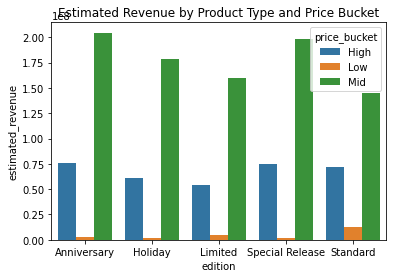

In [0]:
# Summing up revenue by edition and price bucket
revenue_by_type_and_price = sneakers_pd.groupby(['edition', 'price_bucket'])['estimated_revenue'].sum().reset_index()

sns.barplot(data=revenue_by_type_and_price, x='edition', y='estimated_revenue', hue='price_bucket')
plt.title('Estimated Revenue by Product Type and Price Bucket')
plt.show()

- The Anniversary edition in the Mid price bucket generates the highest estimated revenue.

- Yes, there is a noticeable difference: the Mid price bucket produces much higher revenue than the High price bucket for all product types shown in the chart.

## Unsold Inventory Analysis
#### Factors Affecting Unsold Inventory
We will analyze the relationship between unsold inventory and product attributes such as price, edition type, and sell-through rate.

- Questions to answer:
  - Does the sell-through rate correlate with unsold inventory levels?
  - Are limited edition products less likely to remain unsold?

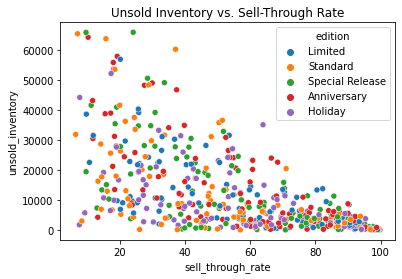

In [0]:
sns.scatterplot(data=sneakers_pd, x='sell_through_rate', y='unsold_inventory', hue='edition')
plt.title('Unsold Inventory vs. Sell-Through Rate')
plt.show()

- Yes, there is a clear negative correlation: as the sell-through rate increases, unsold inventory levels decrease.

- Limited edition products (blue dots) are spread across the chart, so they are not consistently less likely to remain unsold compared to other editions

## Seasonal Trends and Performance Over Time
#### Sales Performance by Month and Quarter
In this section, we will analyze how product sales vary across different months and quarters.

- Questions to answer:

  - Are there certain months (e.g., December, Q4) where sales peak?
  - Do special releases (limited editions) see spikes in sales during specific quarters?

In [0]:
# Select yearly sales data 
TotalSoldYr = sneakers.select('total_sold', 'year')

# display
TotalSoldYr.display()

total_sold,year
5819,2017
16395,2019
8478,2023
5425,2022
11698,2019
7847,2021
43427,2021
23965,2024
46660,2016
89939,2021


Databricks visualization. Run in Databricks to view.

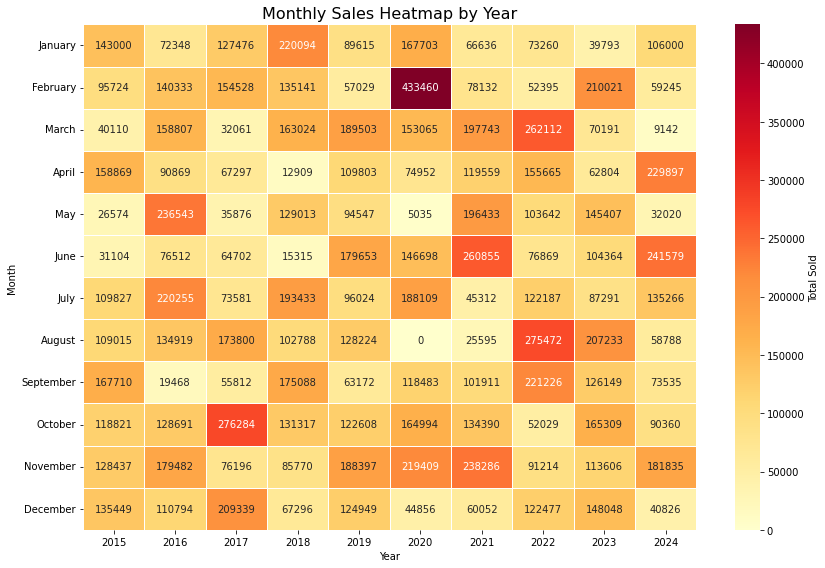

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure months are ordered correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' to categorical for proper ordering
sneakers_pd['month'] = pd.Categorical(sneakers_pd['month'], categories=month_order, ordered=True)

# Pivot table for heatmap: rows=months, columns=years, values=total sold
monthly_sales = sneakers_pd.pivot_table(index='month', columns='year', values='total_sold', aggfunc='sum')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap="YlOrRd", annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Total Sold'})

plt.title('Monthly Sales Heatmap by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


- In Q4 sales often peak in October and November, as shown by the darker (red/orange) cells in those months across several years.
- December also sees high sales in some years, but not as consistently as October and November.
- Overall, the unusual February 2020 in Q1 generally has higher sales than other quarter and months.
- March 2022, June, 2021, August 2022 and June 2024 are among the periods that saw outanding sales.

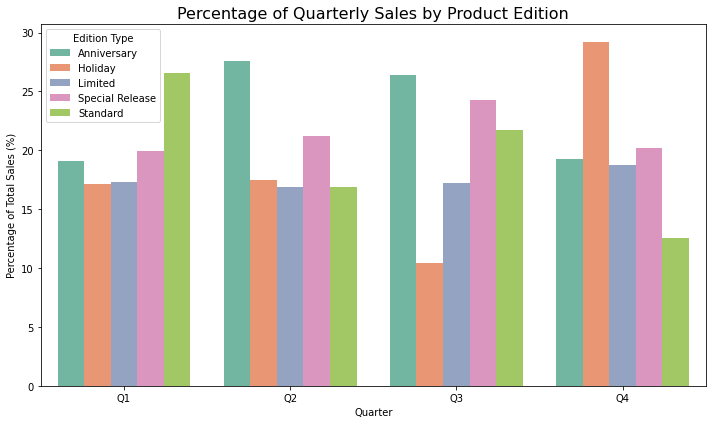

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure proper quarter order
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
sneakers_pd['quarter'] = pd.Categorical(sneakers_pd['quarter'], categories=quarter_order, ordered=True)

# Step 1: Group by quarter and edition
quarterly_sales = sneakers_pd.groupby(['quarter', 'edition'])['total_sold'].sum().reset_index()

# Step 2: Normalize within each quarter to get percentage of total sales per edition
quarter_totals = quarterly_sales.groupby('quarter')['total_sold'].transform('sum')
quarterly_sales['percentage'] = (quarterly_sales['total_sold'] / quarter_totals) * 100

# Step 3: Plot normalized percentages
plt.figure(figsize=(10, 6))
sns.barplot(
    data=quarterly_sales,
    x='quarter',
    y='percentage',
    hue='edition',
    palette='Set2'
)

plt.title('Percentage of Quarterly Sales by Product Edition', fontsize=16)
plt.ylabel('Percentage of Total Sales (%)')
plt.xlabel('Quarter')
plt.legend(title='Edition Type')
plt.tight_layout()
plt.show()


- Special releases (purple bars) see a noticeable spike in sales in Q3.
- Their sales percentage is highest in Q3 compared to other quarters.
- In other quarters, special release sales are steady but lower than in Q3.
- Anniversary edition topped in Q2 and Q3
- Holiday edition saw its peak in Q4 topping every other edition as well.
- Standard edition topped in Q1.

#### Correlation Matrix for:
      - total_produced
      - total_sold
      - sell_through_rate
      - damage_rate
      - unsold_inventory
      - estimated_revenue

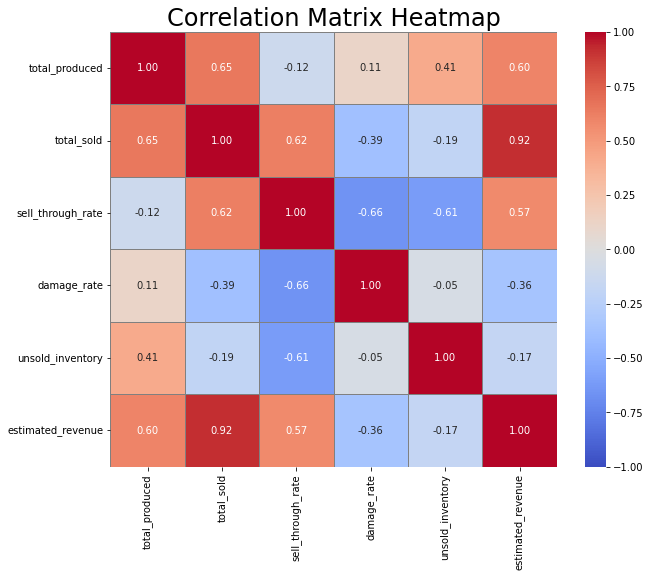

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix for numerical columns
correlation_matrix = sneakers_pd[['total_produced', 'total_sold', 'sell_through_rate', 
                         'damage_rate', 'unsold_inventory', 'estimated_revenue']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            linewidths=0.5, linecolor='gray', fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()


**Insights:**
- Total sold and estimated revenue are very strongly positively correlated (0.92).
- Sell-through rate is moderately positively correlated with total sold (0.62) and estimated revenue (0.57).
- Sell-through rate is strongly negatively correlated with unsold inventory (-0.61) and damage rate (-0.66).
- Unsold inventory is moderately negatively correlated with sell-through rate (-0.61) and weakly negatively correlated with estimated revenue (-0.17).
- Damage rate is strongly negatively correlated with sell-through rate (-0.66) and moderately negatively with estimated revenue (-0.36).
- Total produced has a moderate positive correlation with estimated revenue (0.60) and total sold (0.65), but a weak negative correlation with sell-through rate (-0.12).
- There is little to no correlation between unsold inventory and damage rate (-0.05).

#### Applying Random Forest in forecasting unsold inventory for future production

We will combine numerical fearures(price, sell_through_rate, damage_rate) and categorical features(edition, quarter, price_bucket).....to train a model using the Random Forest regression to predict future unsold inventory before the sneakers are produced. This will enable manufacturer's to know which features to consider and in what proportion in other to get maximum turn over.  

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Step 1: Define numerical and categorical features
numerical_features = ['price', 'sell_through_rate', 'damage_rate']
categorical_features = ['edition', 'quarter', 'price_bucket']

# Step 2: One-hot encode categorical variables
sneakers_pd_encoded = pd.get_dummies(sneakers_pd[categorical_features], drop_first=True)

# Step 3: Combine all features
X = pd.concat([sneakers_pd[numerical_features], sneakers_pd_encoded], axis=1)
y = sneakers_pd['unsold_inventory']

# Step 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 5: Predict unsold inventory
sneakers_pd['predicted_unsold_inventory'] = model.predict(X)


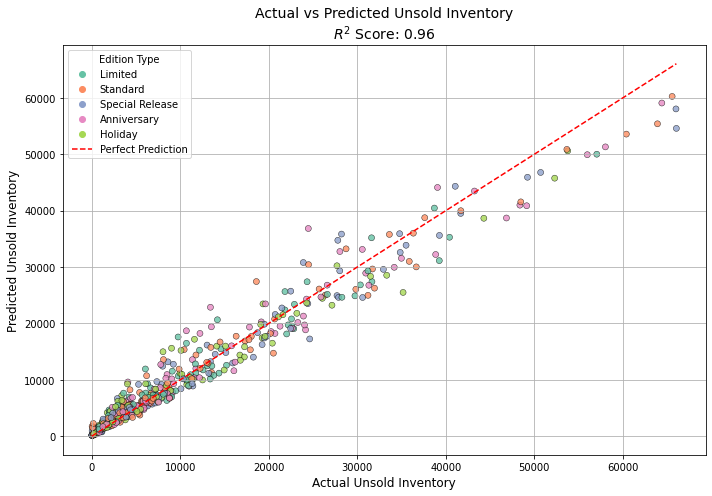

In [0]:
from sklearn.metrics import r2_score

# actual and predicted columns + 'edition'
actual = sneakers_pd['unsold_inventory']
predicted = sneakers_pd['predicted_unsold_inventory']
r2 = r2_score(actual, predicted)

plt.figure(figsize=(10, 7))

# Color points by edition type (optional: change to price_bucket or quarter)
sns.scatterplot(
    data=sneakers_pd,
    x='unsold_inventory',
    y='predicted_unsold_inventory',
    hue='edition',
    palette='Set2',
    alpha=0.8,
    edgecolor='k'
)

# Perfect prediction line
min_val = min(actual.min(), predicted.min())
max_val = max(actual.max(), predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Plot labels and layout
plt.xlabel('Actual Unsold Inventory', fontsize=12)
plt.ylabel('Predicted Unsold Inventory', fontsize=12)
plt.title(f'Actual vs Predicted Unsold Inventory\n$R^2$ Score: {r2:.2f}', fontsize=14)
plt.legend(title='Edition Type')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights:**
- The random forest regression model predicts unsold inventory very accurately, as shown by the high R-square score of 0.96.
- Most data points for all sneaker editions (Limited, Standard, Special Release, Anniversary, Holiday) closely follow the red dashed line, which represents perfect prediction.
- There is no significant bias or systematic error for any specific edition type, as all types are distributed evenly around the perfect prediction line.
- The model performs well across the full range of unsold inventory values, including both low and high inventory levels.

In [0]:
sneakers_pd['error'] = sneakers_pd['unsold_inventory'] - sneakers_pd['predicted_unsold_inventory']
sneakers_pd['absolute_error'] = abs(sneakers_pd['error'])
mean_absolute_error = sneakers_pd['absolute_error'].mean()
print(f"Mean Absolute Error: {mean_absolute_error:.2f} units")

Mean Absolute Error: 1852.89 units


- The model’s predictions are, on average, off by about 1,853 units compared to the actual values.
- This level of error suggests the model is generally accurate for large-scale inventory forecasting, but may still result in noticeable discrepancies for smaller product runs.
- For high-volume products like our sneakers dataset, this error is acceptable.

In [0]:
import pandas as pd

# After training your RandomForestRegressor model
importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature  Importance
1         sell_through_rate    0.529949
2               damage_rate    0.373775
0                     price    0.043168
6          edition_Standard    0.007332
3           edition_Holiday    0.007239
9                quarter_Q4    0.007035
11         price_bucket_Mid    0.006309
4           edition_Limited    0.006184
5   edition_Special Release    0.006151
8                quarter_Q3    0.005761
7                quarter_Q2    0.005611
10         price_bucket_Low    0.001485


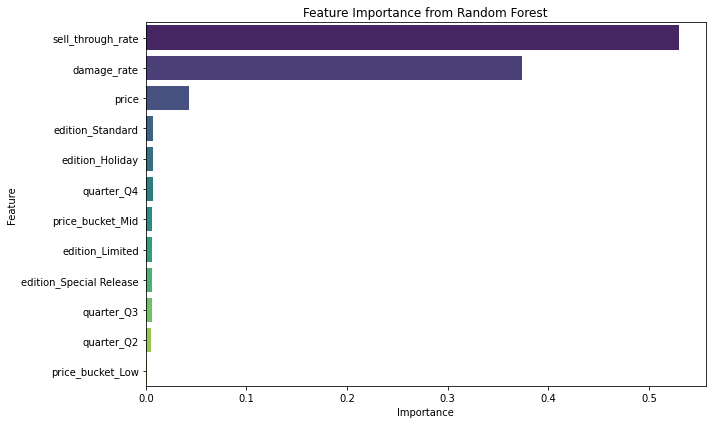

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

**Highlight of feature importance in the model training:**
-   Sell-through rate is by far the most important feature in predicting the target variable, with an importance score above 0.5.
-   Damage rate is the second most important feature, also contributing significantly to the model.
-   Price has a much smaller but still notable impact.
-   All other features (such as edition types, quarters, and price buckets) have very low importance, contributing minimally to the model’s predictions.
-   The model relies mainly on operational metrics (sell-through and damage rates) rather than categorical attributes like edition or season.

In [0]:
# Define the same feature order as training
numerical_features = ['price', 'sell_through_rate', 'damage_rate']
categorical_features = ['edition', 'quarter', 'price_bucket']

# 1. Create a new product as a single-row DataFrame
new_product_data = pd.DataFrame([{
    'price': 120,
    'sell_through_rate': 28.0,
    'damage_rate': 3.0,
    'edition': 'Limited',
    'quarter': 'Q4',
    'price_bucket': 'High'
}])

# 2. One-hot encode categorical features with same columns as training
# Use the original DataFrame (sneakers) to get dummy structure
train_dummies = pd.get_dummies(sneakers_pd[categorical_features], drop_first=True)
new_dummies = pd.get_dummies(new_product_data[categorical_features])

# Align dummy columns with training set
new_dummies_aligned = new_dummies.reindex(columns=train_dummies.columns, fill_value=0)

# 3. Concatenate numerical and dummy features
X_new = pd.concat([new_product_data[numerical_features], new_dummies_aligned], axis=1)

# 4. Predict unsold inventory
predicted_unsold = model.predict(X_new)

print(f"Predicted Unsold Inventory: {predicted_unsold[0]:.0f} units")


Predicted Unsold Inventory: 40695 units


**Insights:**
- The model predicts a high unsold inventory (40,695 units) for this Limited edition product in Q4, priced in the High bucket.
- This predicted value is closer to the upper end of the observed unsold inventory range (9 to 66,063), suggesting a significant risk of overstock.
- The low sell-through rate (28%) and moderate damage rate (3%) are likely driving the high predicted unsold inventory, despite the product being a Limited edition in a peak sales quarter (Q4).
- The combination of high price and low sell-through rate indicates the product may be overpriced for its demand, leading to substantial unsold stock.
**Actionable insight**: 
  - Consider adjusting pricing, improving marketing, or reducing production volume for similar products to avoid excess inventory in future cycles.